In [28]:
import pandas as pd
import numpy as np
import matplotlib
from scipy.stats import pearsonr
from matplotlib import pylab as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

df = pd.read_csv('../data/combined_dataset.csv', header=0)

nrT = np.array(df['TurtleNumber'])
nrP = np.array(df['PeopleNumber'])
# collect unique days
datetime = df['DateTime']
days = np.array([d[:10] for d in np.array(datetime)])
unique_days = sorted(np.unique(days))

df['Year'] = pd.to_datetime(datetime).dt.year
df['Month'] = pd.to_datetime(datetime).dt.month
df['Day'] = pd.to_datetime(datetime).dt.day
df['Hour'] = pd.to_datetime(datetime).dt.hour
df['Min'] = pd.to_datetime(datetime).dt.minute
df['weekday'] = pd.to_datetime(datetime).dt.weekday
df['weekend'] = (pd.to_datetime(datetime).dt.weekday > 4).astype(int)



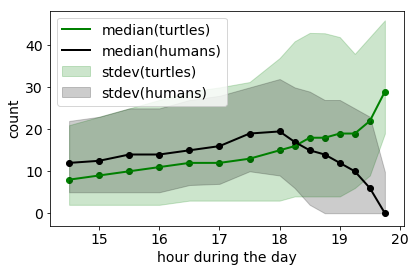

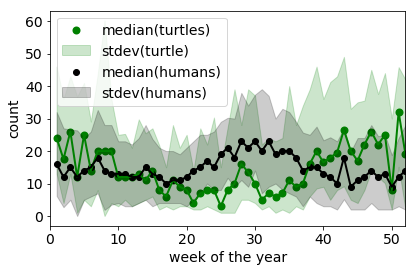

In [29]:
float_hour = 1e0*(pd.to_datetime(datetime).dt.hour +  pd.to_datetime(datetime).dt.minute/60e0)
unique_hours = np.unique(float_hour)
meds = np.zeros([len(unique_hours),2])
stdm = np.zeros([len(unique_hours),2])
stdp = np.zeros([len(unique_hours),2])

for i in range(len(unique_hours)):
    meds[i,0] = np.median(nrT[float_hour == unique_hours[i]])
    stdm[i,0] = np.percentile(nrT[float_hour == unique_hours[i]],16)
    stdp[i,0] = np.percentile(nrT[float_hour == unique_hours[i]],84)

    meds[i,1] = np.median(nrP[float_hour == unique_hours[i]])
    stdm[i,1] = np.percentile(nrP[float_hour == unique_hours[i]],16)
    stdp[i,1] = np.percentile(nrP[float_hour == unique_hours[i]],84)
    
#plt.figure(figsize=(6.4*2,4.8))
#plt.subplot(121) 
plt.plot(unique_hours,meds[:,0],color='g',linewidth=2,label='median(turtles)')
plt.fill_between(unique_hours, stdm[:,0], stdp[:,0],alpha=0.2,color='g',label='stdev(turtles)')
plt.scatter(unique_hours,meds[:,0],color='g')
plt.scatter(unique_hours,meds[:,1],color='k')
plt.plot(unique_hours,meds[:,1],color='k',linewidth=2,label='median(humans)')
plt.fill_between(unique_hours, stdm[:,1], stdp[:,1],alpha=0.2,color='k',label='stdev(humans)')
#labelLines(plt.gca().get_lines(),zorder=2.5,backgroundcolor=None)
plt.xlabel('hour during the day')
plt.ylabel('count')
#plt.title('Turtles come to shore towards the end of the day.')
#plt.text(14.9, 48.95, "Turtles", ha="right", va="bottom",color="green",fontweight='bold',fontsize=17)
#plt.text(14.9, 48.95, " come to shore towards the end of the day.", ha="left", va="bottom",fontsize=17)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('../results/daily_trends.png',dpi=300)
plt.show()

float_day = 1e0*pd.to_datetime(datetime).dt.week
unique_days = np.unique(float_day)
meds = np.zeros([len(unique_days),2])
stdm = np.zeros([len(unique_days),2])
stdp = np.zeros([len(unique_days),2])

for i in range(len(unique_days)):
    meds[i,0] = np.median(nrT[float_day == unique_days[i]])
    stdm[i,0] = np.percentile(nrT[float_day == unique_days[i]],16)
    stdp[i,0] = np.percentile(nrT[float_day == unique_days[i]],84)

    meds[i,1] = np.median(nrP[float_day == unique_days[i]])
    stdm[i,1] = np.percentile(nrP[float_day == unique_days[i]],16)
    stdp[i,1] = np.percentile(nrP[float_day == unique_days[i]],84)

#plt.subplot(122) 
#plt.figure(figsize=(6.4,4.8))
plt.plot(unique_days,meds[:,0],color='g',linewidth=2)
#plt.text(unique_days[-1],meds[-1,0], 'turtles',color='g',va='center')
plt.scatter(unique_days,meds[:,0],color='g',linewidth=2,label='median(turtles)')
plt.fill_between(unique_days, stdm[:,0], stdp[:,0],alpha=0.2,color='g',label='stdev(turtle)')
plt.plot(unique_days,meds[:,1],color='k',linewidth=2)
plt.scatter(unique_days,meds[:,1],color='k',label='median(humans)')
plt.fill_between(unique_days, stdm[:,1], stdp[:,1],alpha=0.2,color='k',label='stdev(humans)')
plt.xlabel('week of the year')
plt.ylabel('count')
plt.xlim([0,52])
#plt.title('More humans in the summer, more turtles in the winter.')
#plt.text(-1.9, 63.5, "More", ha="right", va="bottom",fontsize=17)
#plt.text(-1.9, 63.5, " humans", ha="left", va="bottom",fontweight='bold',fontsize=17)
#plt.text(8.4, 63.5, "during the summer, more", ha="left", va="bottom",fontsize=17)
#plt.text(42, 63.5, "turtles", ha="right", va="bottom",fontweight='bold',color='green',fontsize=17)
#plt.text(42, 63.5, " during the winter.", ha="left", va="bottom",fontsize=17)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('../results/yearly_trends.png',dpi=300)
plt.show()


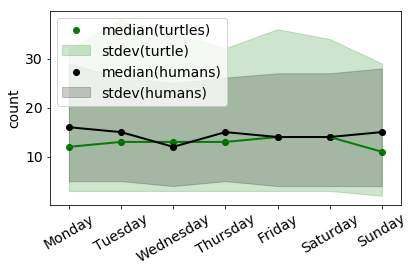

In [30]:
weekday = pd.to_datetime(datetime).dt.weekday
unique_days = np.unique(weekday)
meds = np.zeros([len(unique_days),2])
stdm = np.zeros([len(unique_days),2])
stdp = np.zeros([len(unique_days),2])

for i in range(len(unique_days)):
    meds[i,0] = np.median(nrT[weekday == unique_days[i]])
    stdm[i,0] = np.percentile(nrT[weekday == unique_days[i]],16)
    stdp[i,0] = np.percentile(nrT[weekday == unique_days[i]],84)

    meds[i,1] = np.median(nrP[weekday == unique_days[i]])
    stdm[i,1] = np.percentile(nrP[weekday == unique_days[i]],16)
    stdp[i,1] = np.percentile(nrP[weekday == unique_days[i]],84)
    
#plt.figure(figsize=(6.4,4.8))
plt.plot(unique_days,meds[:,0],color='g',linewidth=2)
plt.scatter(unique_days,meds[:,0],label='median(turtles)',color='g')
plt.fill_between(unique_days, stdm[:,0], stdp[:,0],alpha=0.2,color='g',label='stdev(turtle)')
plt.plot(unique_days,meds[:,1],color='k',linewidth=2)
plt.scatter(unique_days,meds[:,1],label='median(humans)',color='k')
plt.fill_between(unique_days, stdm[:,1], stdp[:,1],alpha=0.2,color='k',label='stdev(humans)')
plt.xticks(range(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=30)
plt.ylabel('count')
#plt.title('Human presence is not stronger during the weekend.')
#plt.text(0.9, 40, "Human", ha="right", va="bottom",fontweight='bold',fontsize=17)
#plt.text(0.9, 40, " presence is not stronger during the weekend.", ha="left", va="bottom",fontsize=17)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('../results/weekly_trends.png',dpi=300)
plt.show()

In [31]:
# float_day = 1e0*pd.to_datetime(datetime).dt.week
# unique_days = np.unique(float_day)
# meds = np.zeros([len(unique_days),2])
# stdm = np.zeros([len(unique_days),2])
# stdp = np.zeros([len(unique_days),2])

# for i in range(len(unique_days)):
#     meds[i,0] = np.median(nrT[float_day == unique_days[i]])
#     stdm[i,0] = np.percentile(nrT[float_day == unique_days[i]],16)
#     stdp[i,0] = np.percentile(nrT[float_day == unique_days[i]],84)

#     meds[i,1] = np.median(nrP[float_day == unique_days[i]])
#     stdm[i,1] = np.percentile(nrP[float_day == unique_days[i]],16)
#     stdp[i,1] = np.percentile(nrP[float_day == unique_days[i]],84)
    
# #plt.figure(figsize=(6.4,4.8))
# plt.plot(unique_days,meds[:,0],color='g',linewidth=2)
# #plt.text(unique_days[-1],meds[-1,0], 'turtles',color='g',va='center')
# plt.scatter(unique_days,meds[:,0],color='g',linewidth=2,label='median(turtles)')
# plt.fill_between(unique_days, stdm[:,0], stdp[:,0],alpha=0.2,color='g',label='stdev(turtle)')
# plt.plot(unique_days,meds[:,1],color='k',linewidth=2)
# plt.scatter(unique_days,meds[:,1],color='k',label='median(humans)')
# plt.fill_between(unique_days, stdm[:,1], stdp[:,1],alpha=0.2,color='k',label='stdev(humans)')
# plt.xlabel('week of the year')
# plt.ylabel('count')
# plt.xlim([0,52])
# #plt.title('More humans in summer, more turtles in winter.')
# #plt.text(-1.9, 63.5, "More", ha="right", va="bottom",fontsize=17)
# #plt.text(-1.9, 63.5, " humans", ha="left", va="bottom",fontweight='bold',fontsize=17)
# #plt.text(8.4, 63.5, "during the summer, more", ha="left", va="bottom",fontsize=17)
# #plt.text(42, 63.5, "turtles", ha="right", va="bottom",fontweight='bold',color='green',fontsize=17)
# #plt.text(42, 63.5, " during the winter.", ha="left", va="bottom",fontsize=17)
# plt.legend(loc=2)
# plt.tight_layout()
# plt.savefig('../results/trends.png',dpi=300)

# plt.show()

113.0


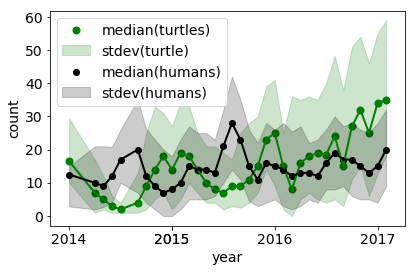

In [32]:
year = 1e0*pd.to_datetime(datetime).dt.year
#float_day = year + 1e0*pd.to_datetime(datetime).dt.week/52e0
float_day = year + 1e0*pd.to_datetime(datetime).dt.month/12e0

unique_days = np.unique(float_day)[:-1]
meds = np.zeros([len(unique_days),2])
stdm = np.zeros([len(unique_days),2])
stdp = np.zeros([len(unique_days),2])

print(np.max(nrP))

for i in range(len(unique_days)):
    meds[i,0] = np.median(nrT[float_day == unique_days[i]])
    stdm[i,0] = np.percentile(nrT[float_day == unique_days[i]],16)
    stdp[i,0] = np.percentile(nrT[float_day == unique_days[i]],84)

    meds[i,1] = np.median(nrP[float_day == unique_days[i]])
    stdm[i,1] = np.percentile(nrP[float_day == unique_days[i]],16)
    stdp[i,1] = np.percentile(nrP[float_day == unique_days[i]],84)
    
#plt.figure(figsize=(6.4,4.8))
plt.plot(unique_days,meds[:,0],color='g',linewidth=2)
plt.xticks([2014,2015,2015,2016,2017])
plt.scatter(unique_days,meds[:,0],color='g',linewidth=2,label='median(turtles)')
plt.fill_between(unique_days, stdm[:,0], stdp[:,0],alpha=0.2,color='g',label='stdev(turtle)')
plt.plot(unique_days,meds[:,1],color='k',linewidth=2)
plt.scatter(unique_days,meds[:,1],color='k',label='median(humans)')
plt.fill_between(unique_days, stdm[:,1], stdp[:,1],alpha=0.2,color='k',label='stdev(humans)')
plt.xlabel('year')
plt.ylabel('count')
#plt.title('More humans during the summer, more turtles during the winter.')
#plt.text(-1.9, 63.5, "More", ha="right", va="bottom",fontsize=17)
#plt.text(-1.9, 63.5, " humans", ha="left", va="bottom",fontweight='bold',fontsize=17)
#plt.text(8.4, 63.5, "during the summer, more", ha="left", va="bottom",fontsize=17)
#plt.text(42, 63.5, "turtles", ha="right", va="bottom",fontweight='bold',color='green',fontsize=17)
#plt.text(42, 63.5, " during the winter.", ha="left", va="bottom",fontsize=17)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('../results/trends.png',dpi=300)
plt.show()

['SKYCONDITIONS', 'VISIBILITY', 'WETBULBTEMPC', 'WindDirection', 'WindGustSpeed', 'StationPressure', 'SeaLevelPressure', 'Precip', 'AltimeterSetting', 'Wave Height', 'Dominant Wave Period', 'Average Wave Period', 'Wave Direction']
[0.090325891711573, 0.090325891711573, 0.014113420579933282, 0.023436831750919512, 0.6898468907706783, 0.013771277050722779, 0.036865965272431786, 0.20297664870413137, 0.07723890171927124, 0.125310067573347, 0.125310067573347, 0.125310067573347, 0.125310067573347]


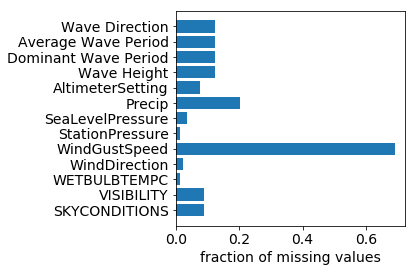

In [39]:
# fraction of missing values
columns = list(df.columns)

frac_missing = []
col_missing = []
for c in columns:
    if df[c].isnull().sum()/len(df[c]) > 0.01:
        
        frac_missing.append(df[c].isnull().sum()/len(df[c]))
        col_missing.append(c)
        
print(col_missing)
print(frac_missing)
plt.barh(np.arange(len(col_missing)),frac_missing)
plt.yticks(np.arange(len(col_missing)),col_missing)
plt.xlabel('fraction of missing values')
plt.tight_layout()
plt.savefig('../results/missing_values.png',dpi=300)
plt.show()



Nr_Volunteers


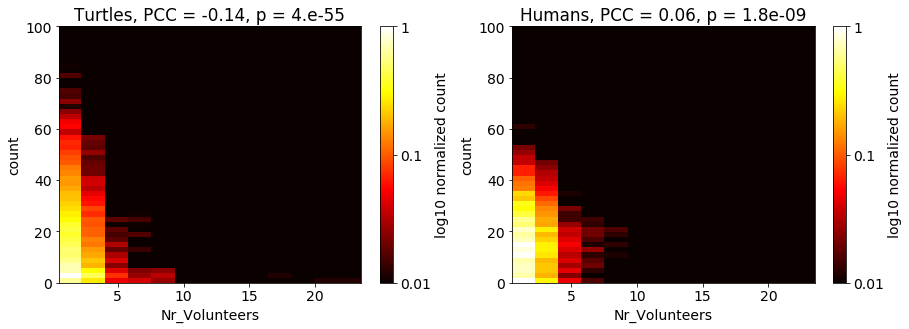

tide


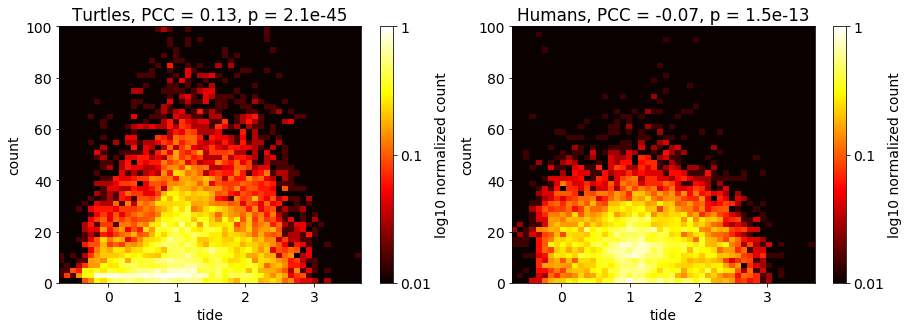

daily mean tide


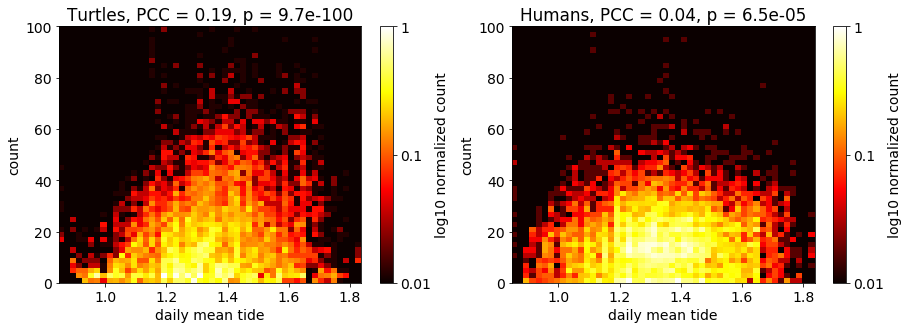

daily min tide


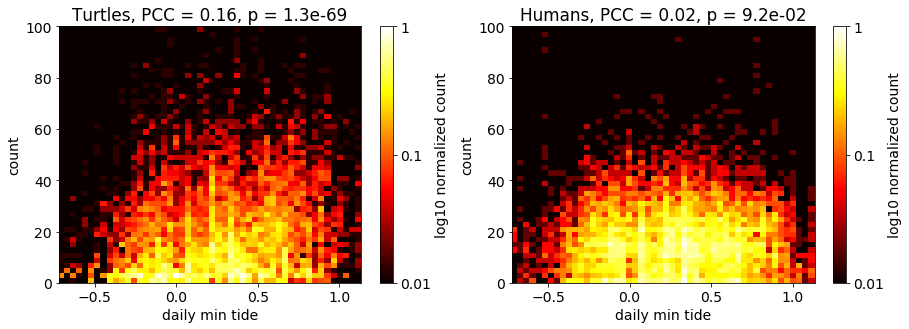

daily max tide


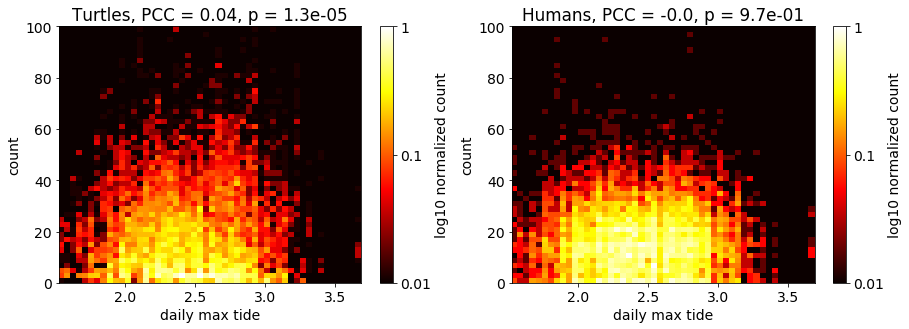

daily stdev tide


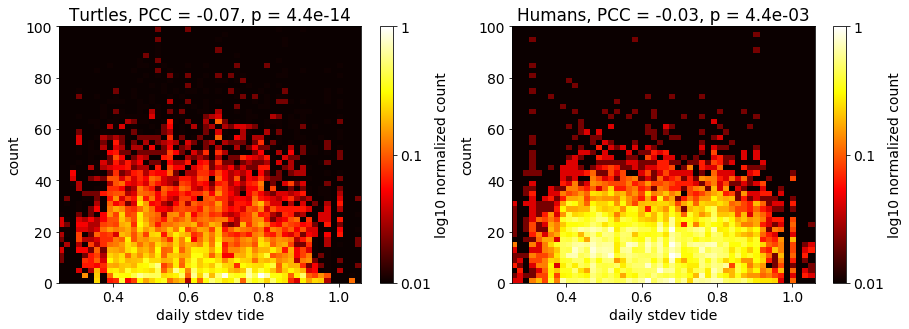

total tourists, 1 day(s) ago


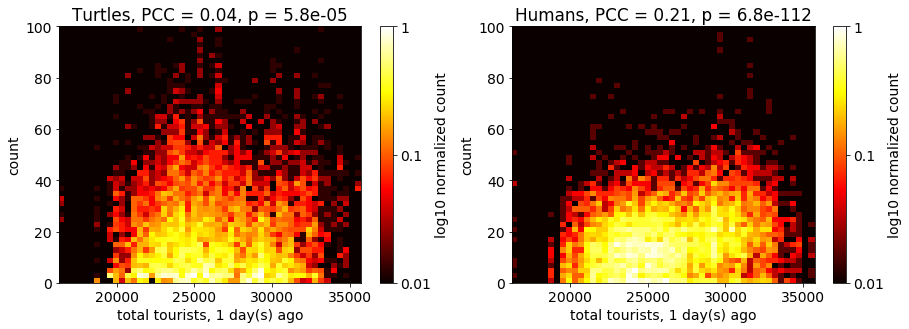

domestic tourists, 1 day(s) ago


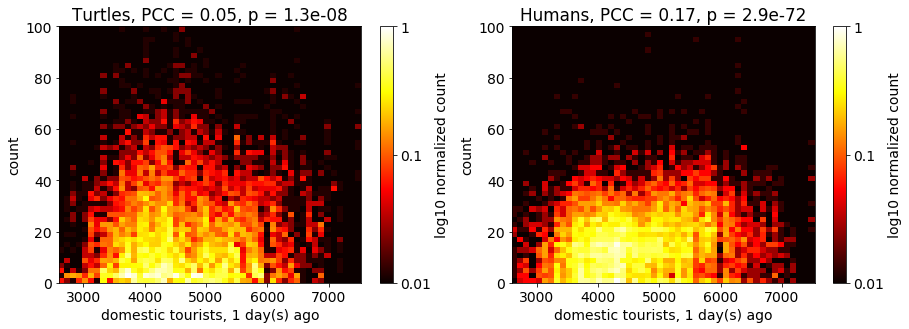

international tourists, 1 day(s) ago


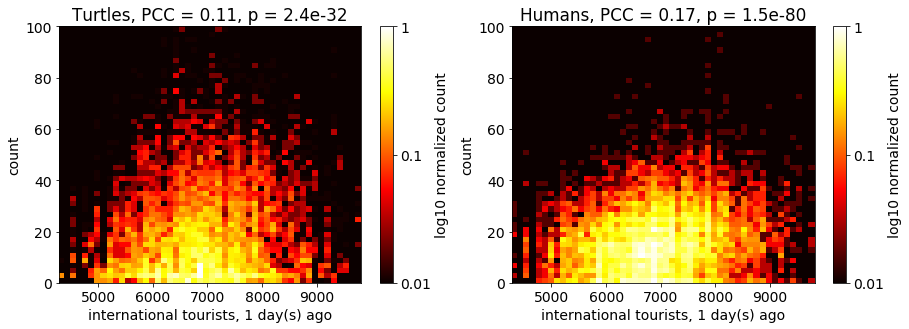

japanese tourists, 1 day(s) ago


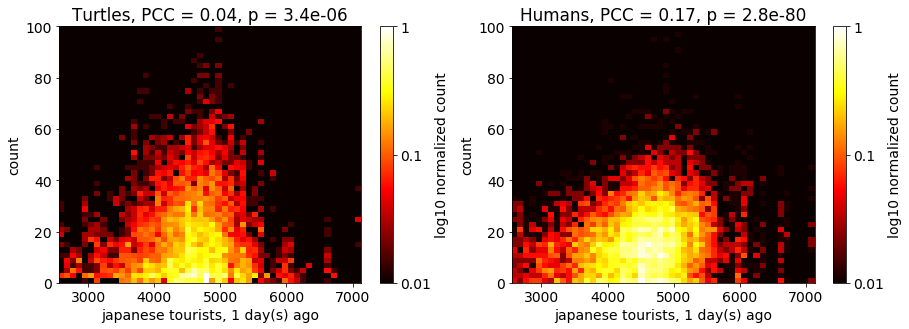

other tourists,1 day(s) ago


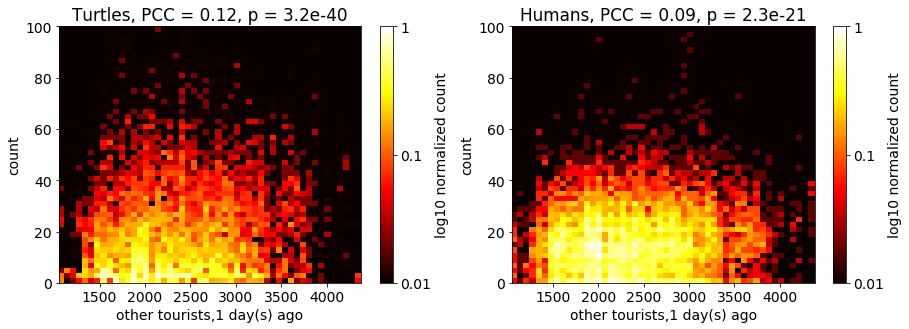

total tourists, 2 day(s) ago


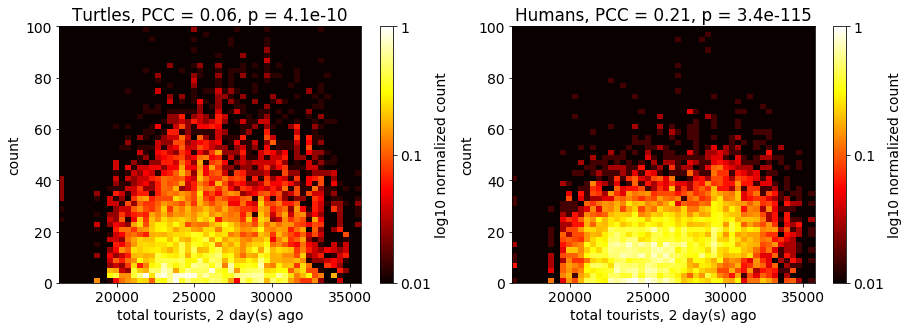

domestic tourists, 2 day(s) ago


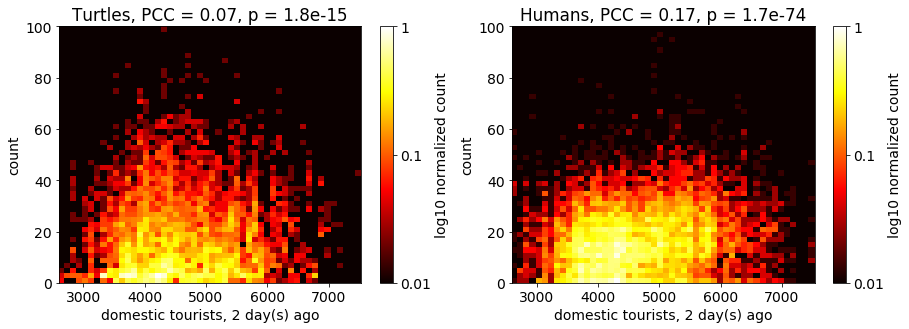

international tourists, 2 day(s) ago


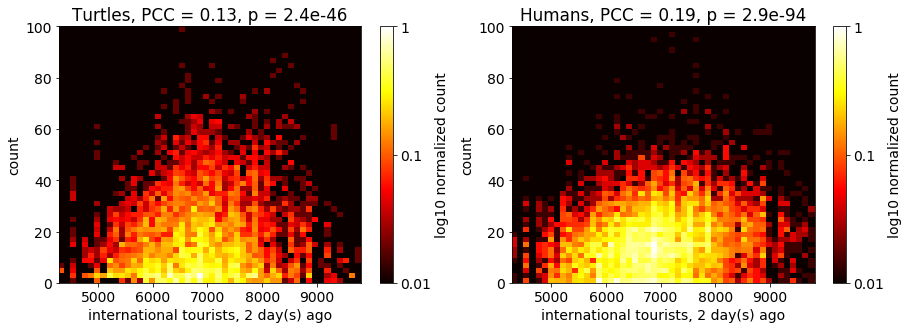

japanese tourists, 2 day(s) ago


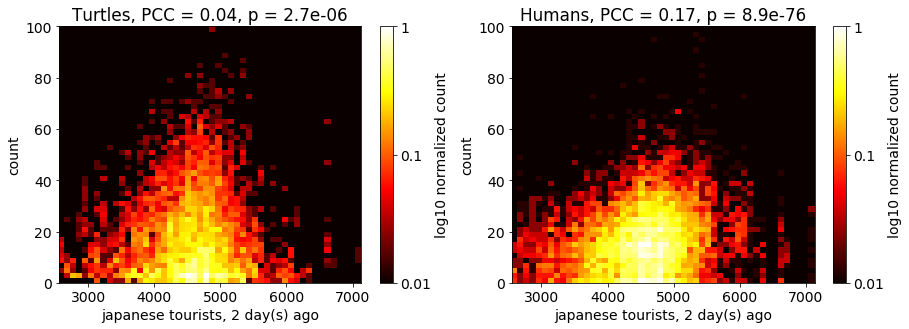

other tourists,2 day(s) ago


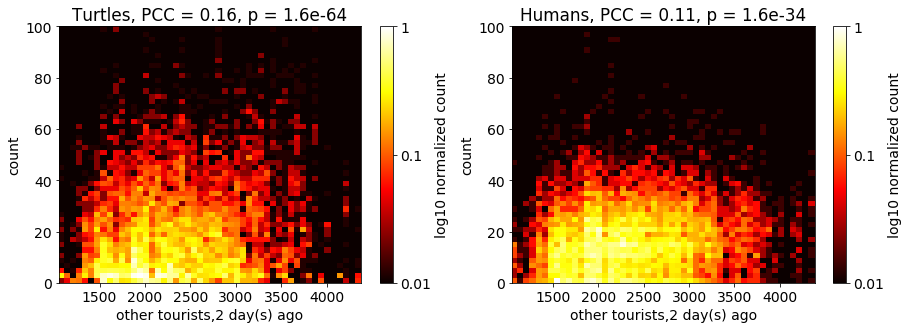

total tourists, 3 day(s) ago


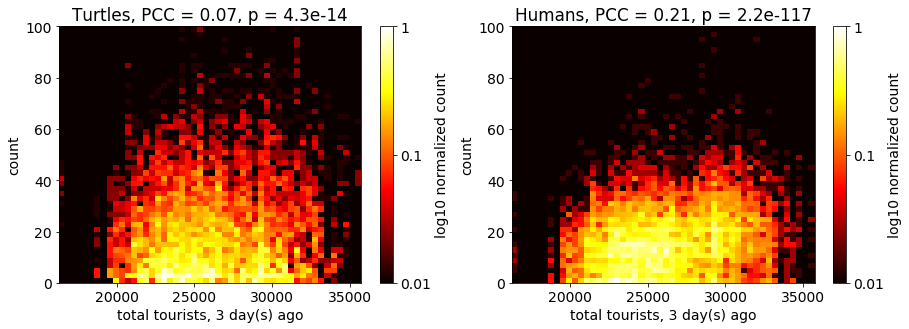

domestic tourists, 3 day(s) ago


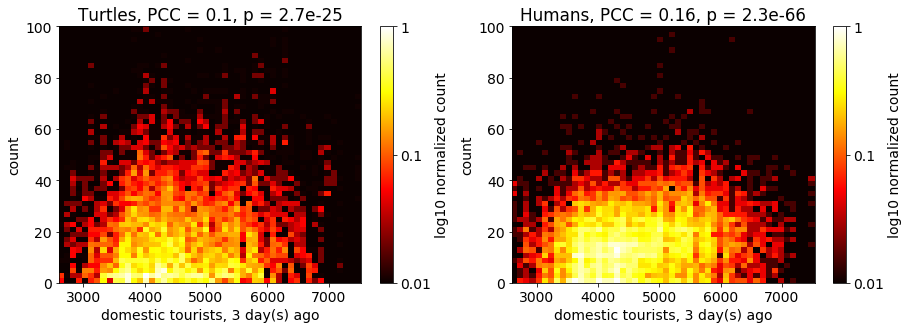

international tourists, 3 day(s) ago


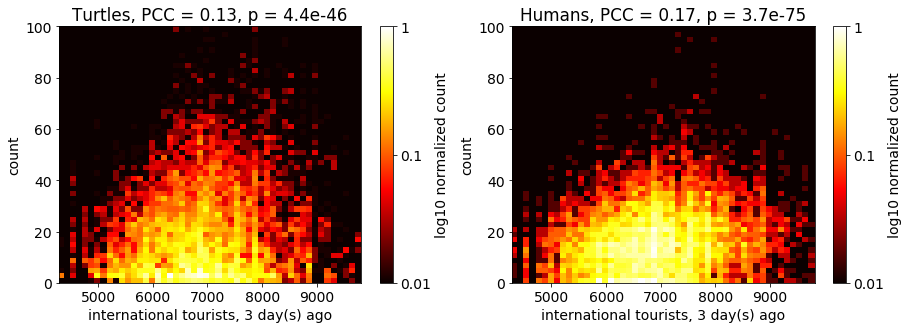

japanese tourists, 3 day(s) ago


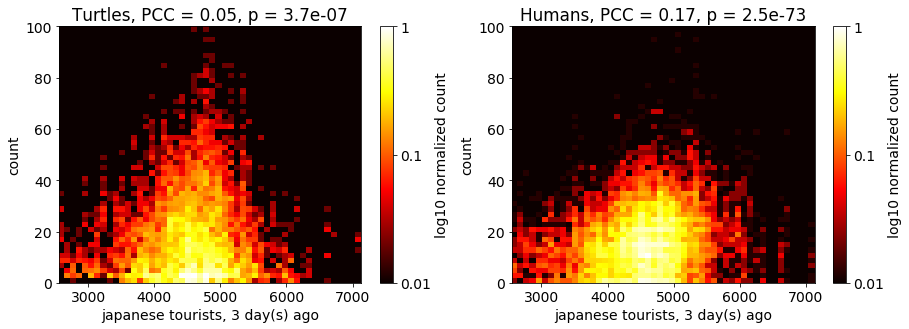

other tourists,3 day(s) ago


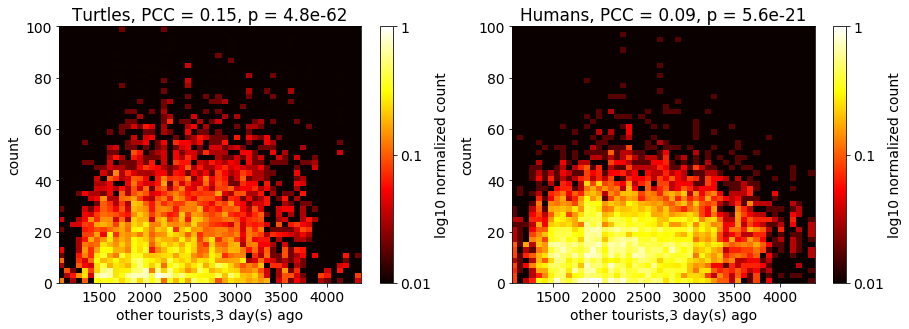

total tourists, 4 day(s) ago


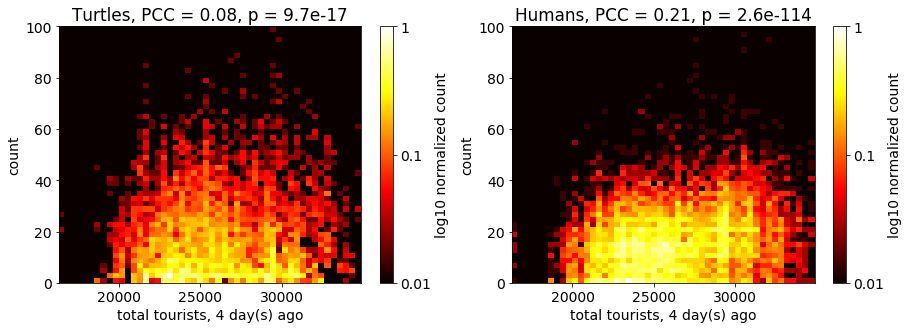

domestic tourists, 4 day(s) ago


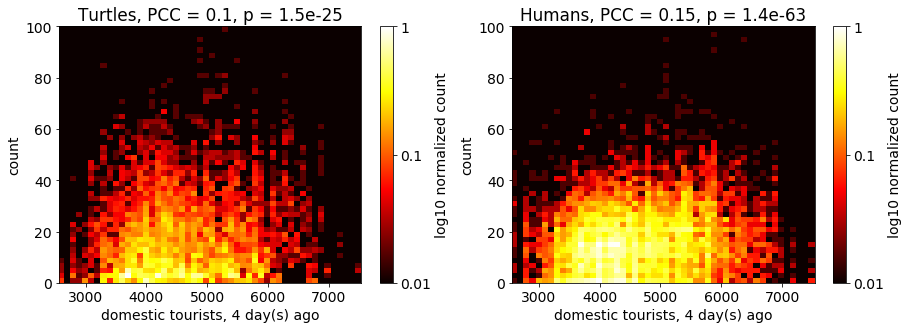

international tourists, 4 day(s) ago


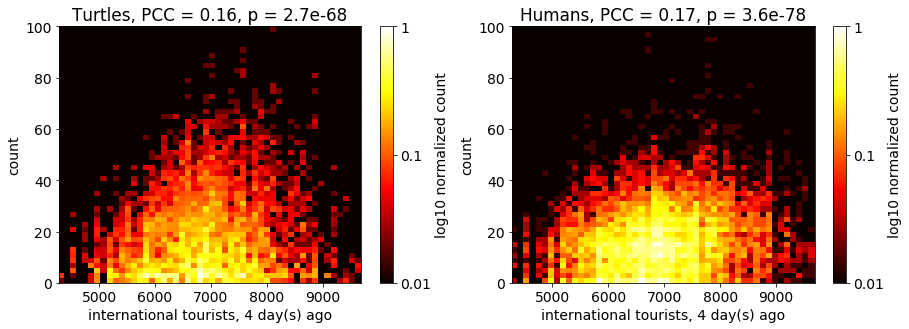

japanese tourists, 4 day(s) ago


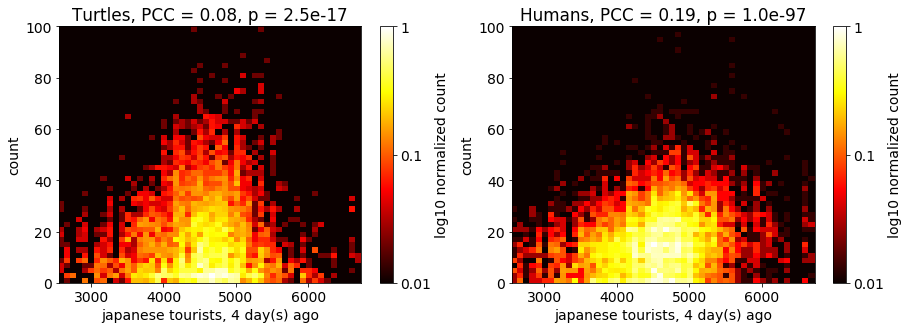

other tourists,4 day(s) ago


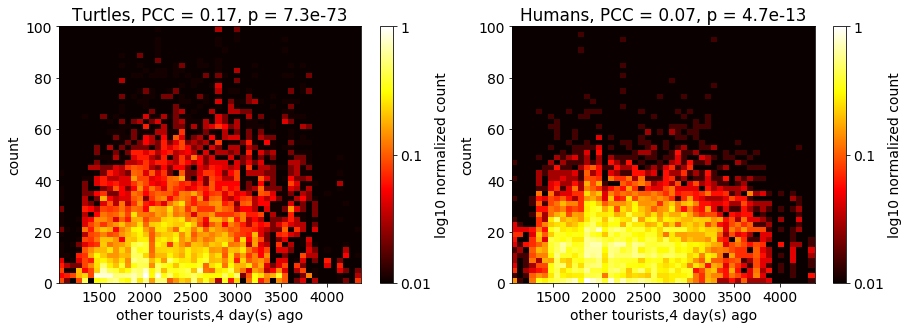

total tourists, 5 day(s) ago


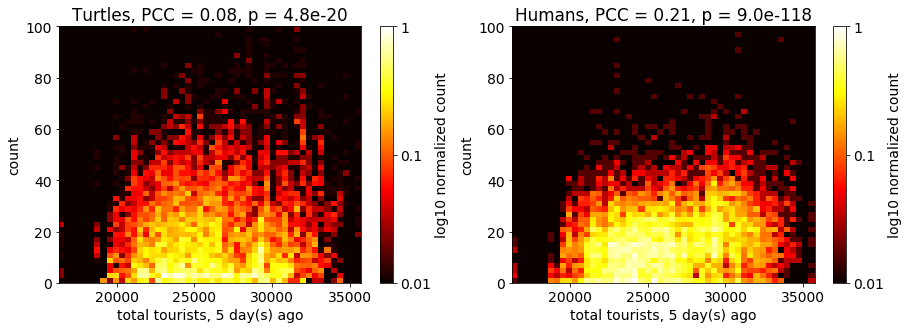

domestic tourists, 5 day(s) ago


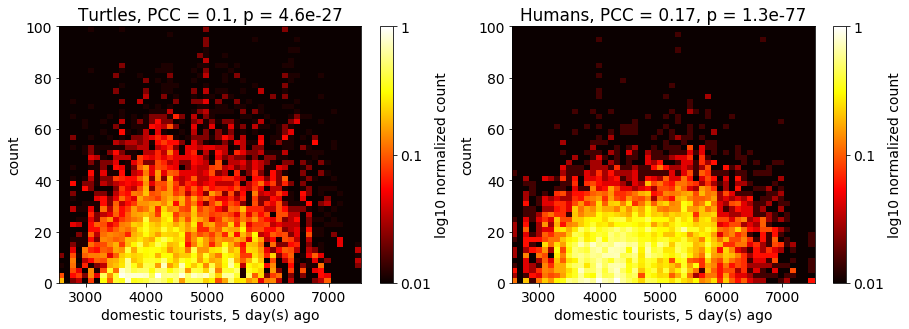

international tourists, 5 day(s) ago


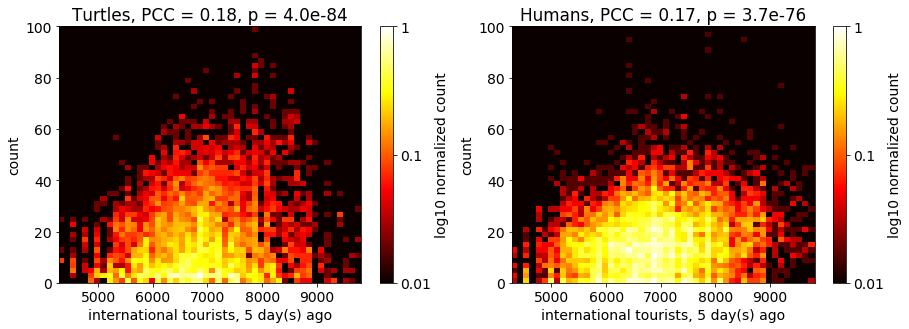

japanese tourists, 5 day(s) ago


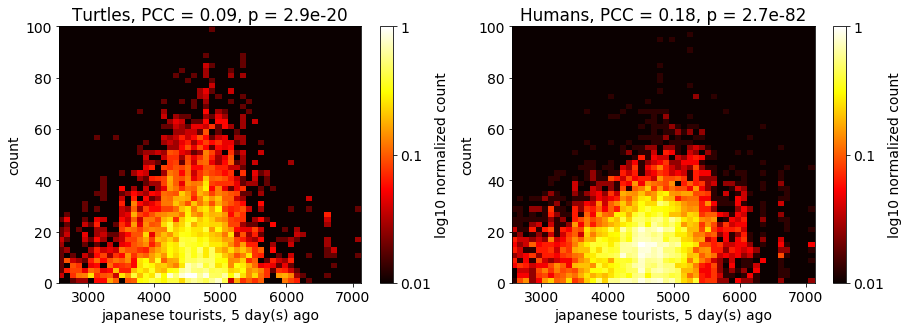

other tourists,5 day(s) ago


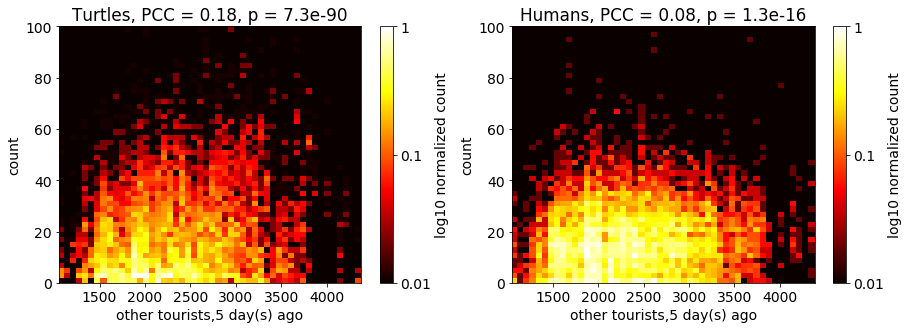

total tourists, 6 day(s) ago


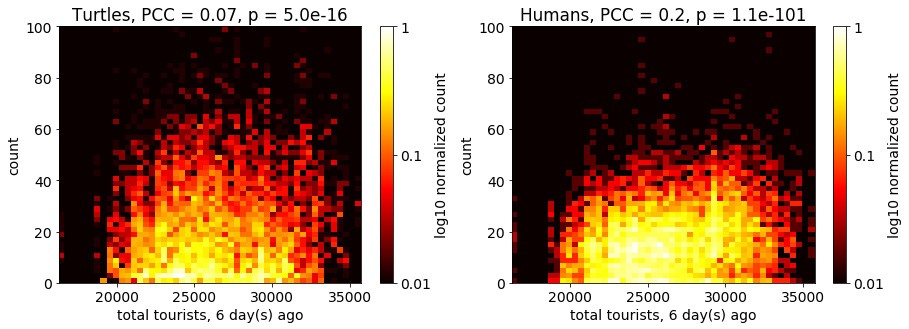

domestic tourists, 6 day(s) ago


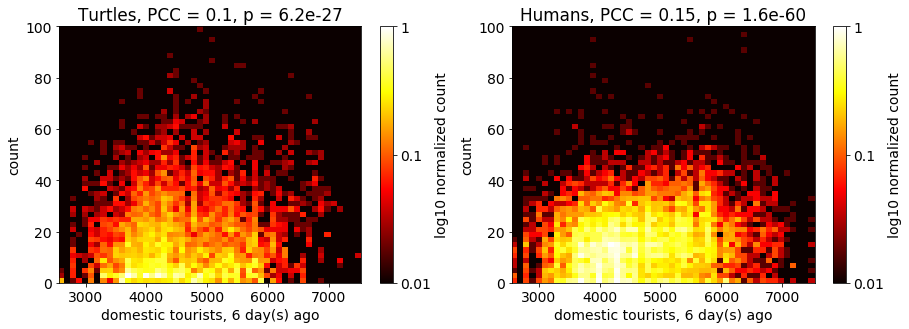

international tourists, 6 day(s) ago


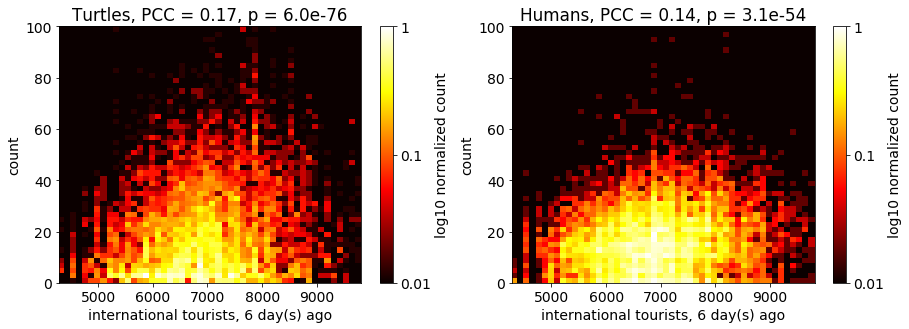

japanese tourists, 6 day(s) ago


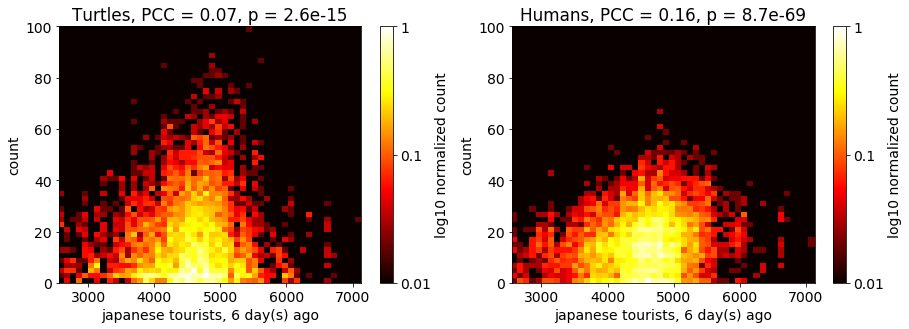

other tourists,6 day(s) ago


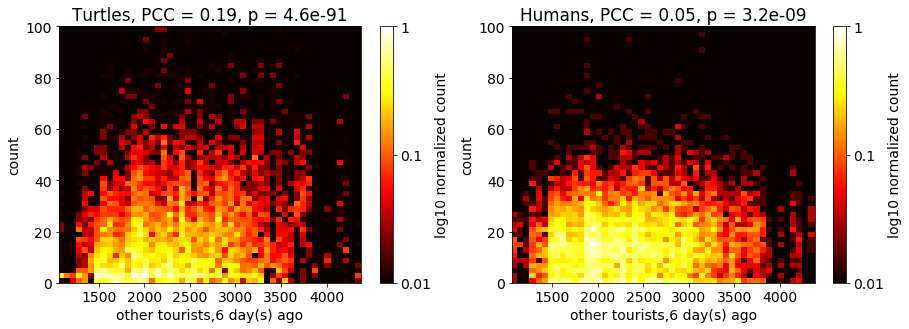

total tourists, 7 day(s) ago


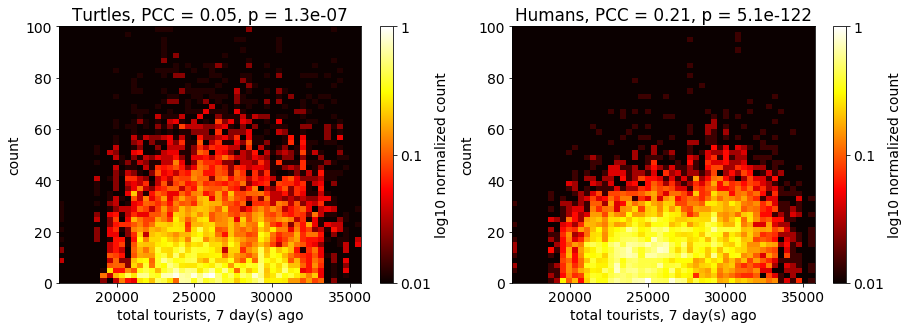

domestic tourists, 7 day(s) ago


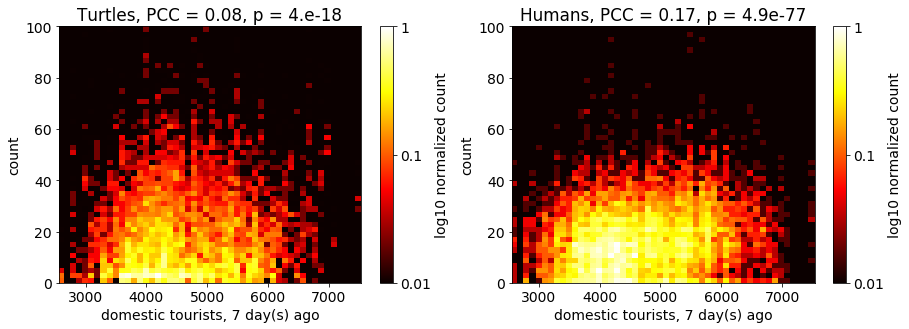

international tourists, 7 day(s) ago


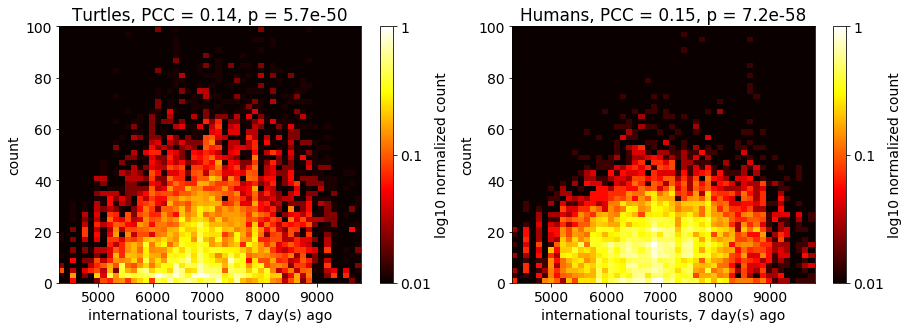

japanese tourists, 7 day(s) ago


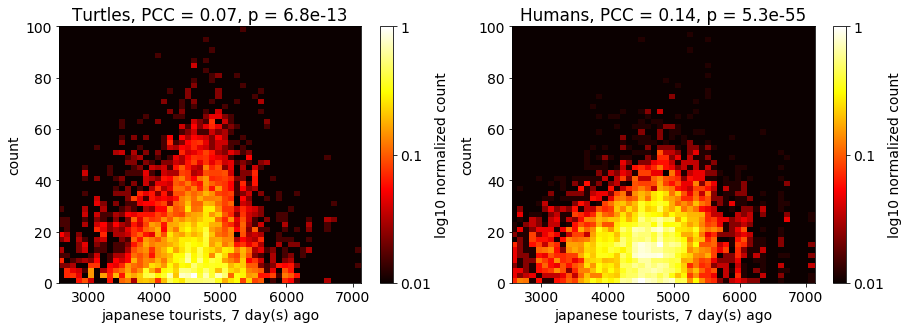

other tourists,7 day(s) ago


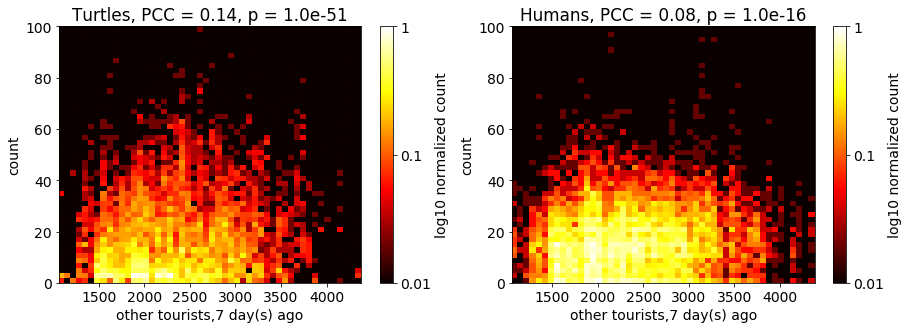

SKYCONDITIONS


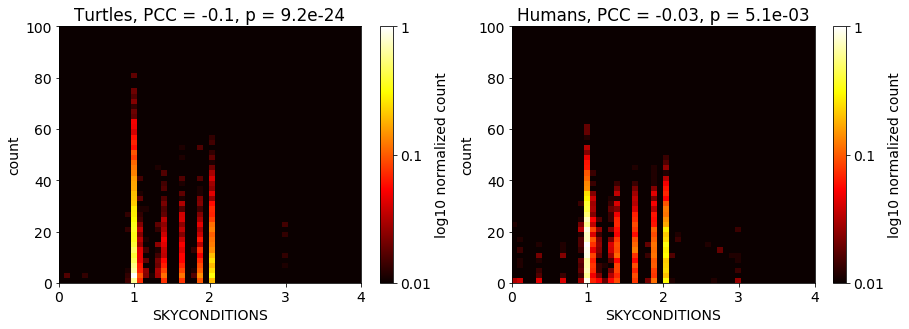

VISIBILITY


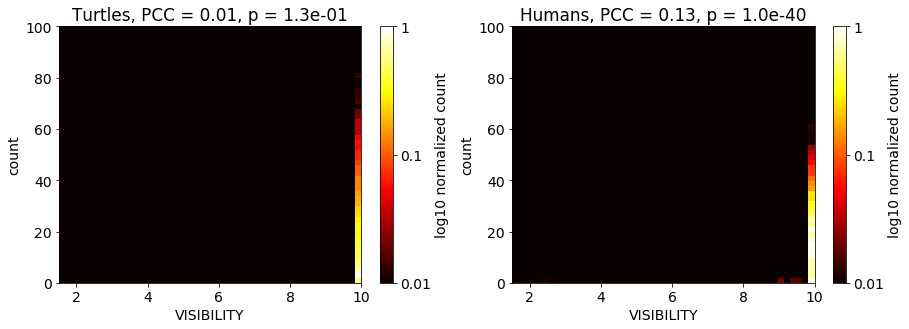

DRYBULBTEMPC


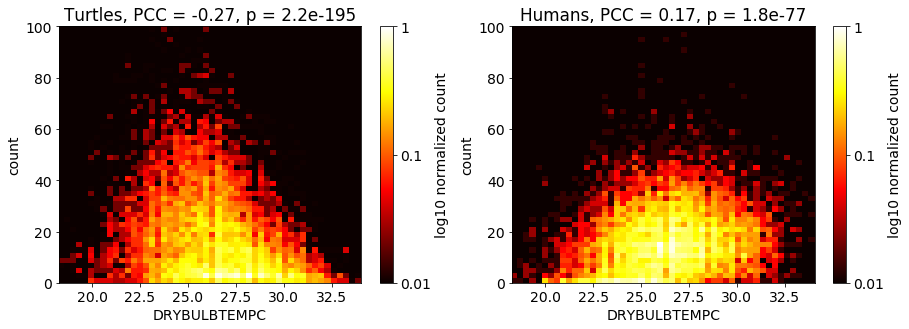

WETBULBTEMPC


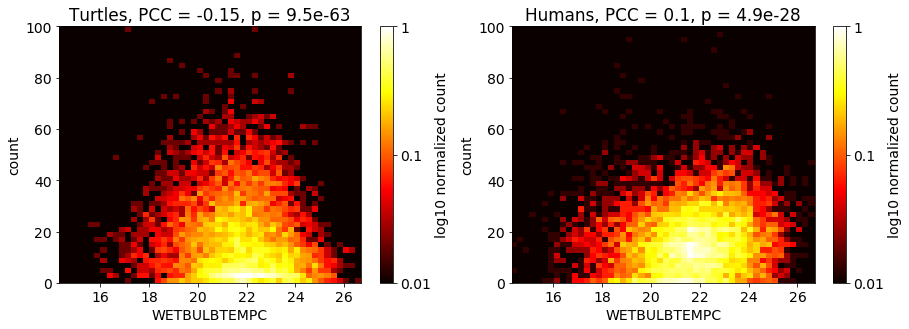

DewPointTempC


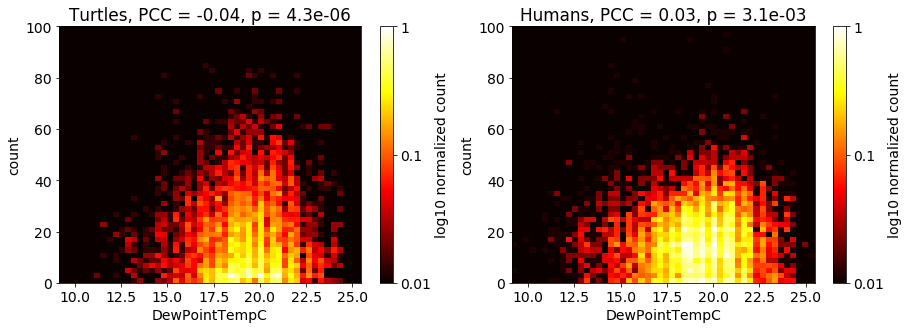

RelativeHumidity


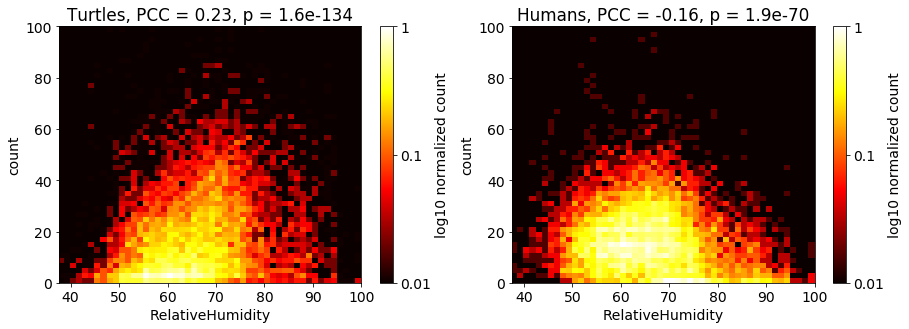

WindSpeed


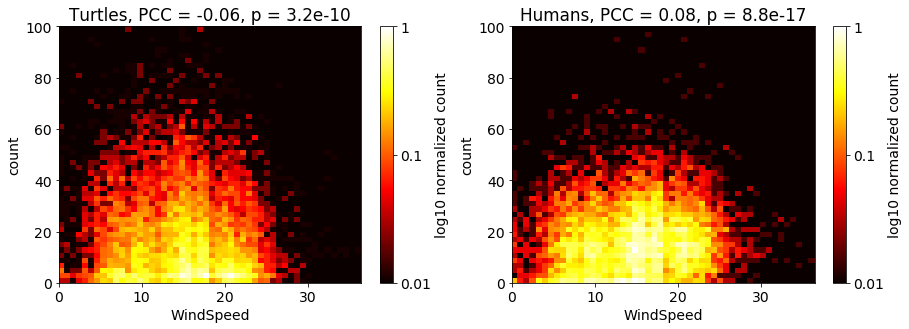

WindDirection


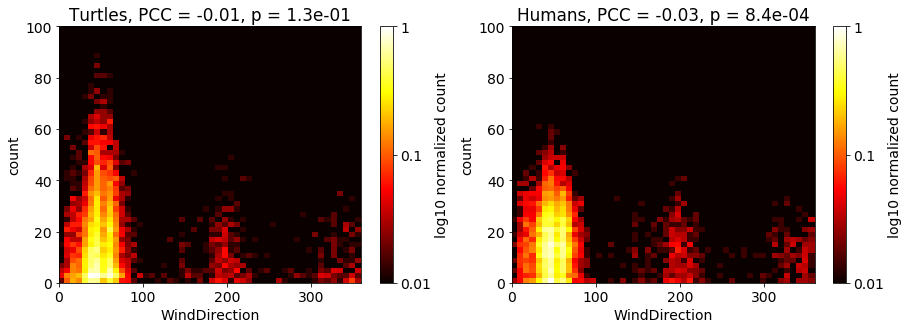

WindGustSpeed


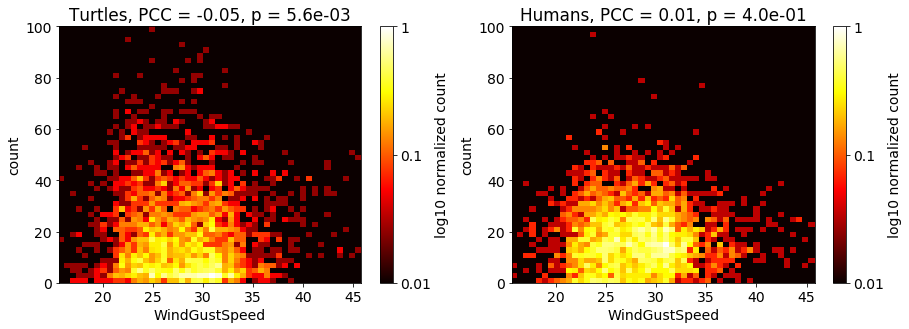

StationPressure


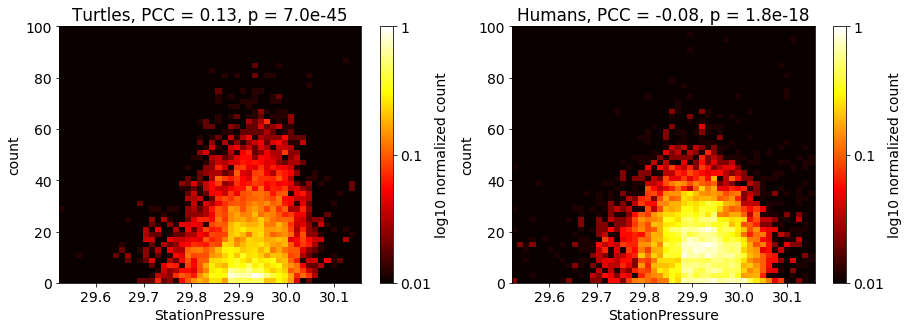

SeaLevelPressure


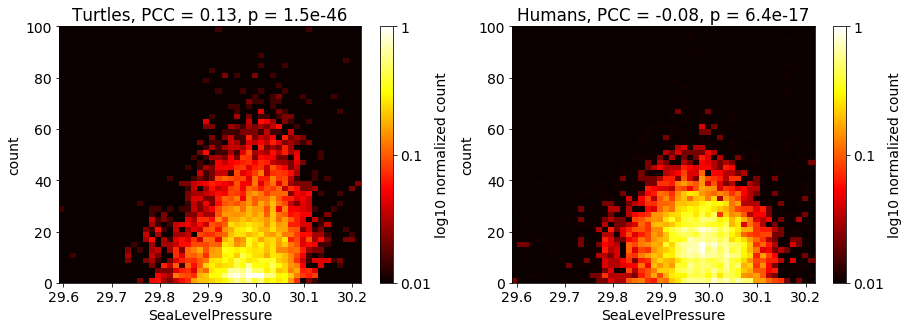

Precip


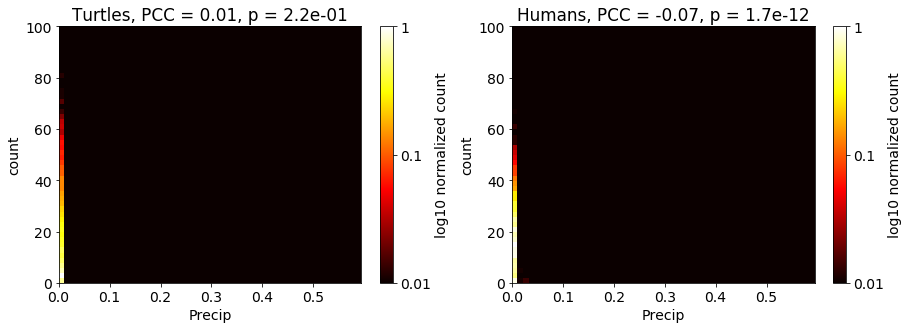

AltimeterSetting


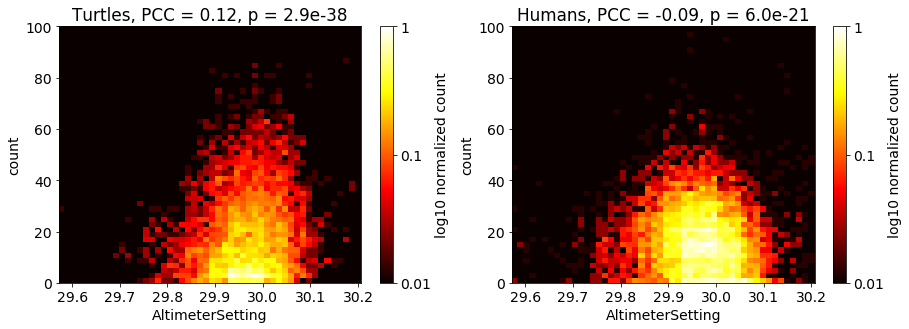

Wave Height


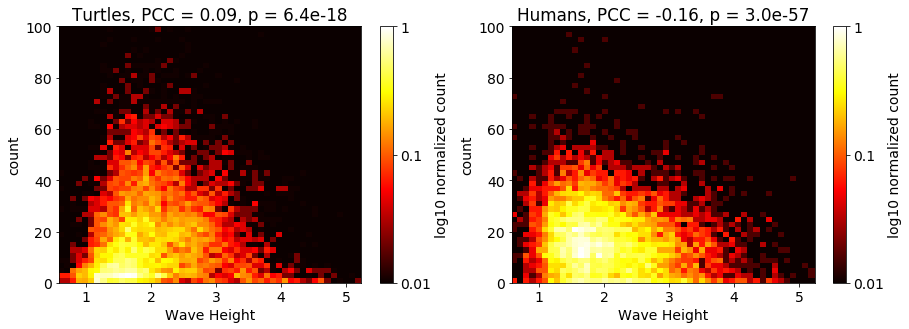

Dominant Wave Period


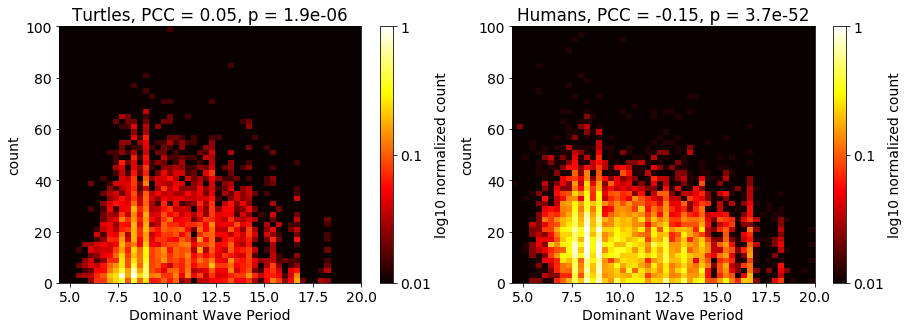

Average Wave Period


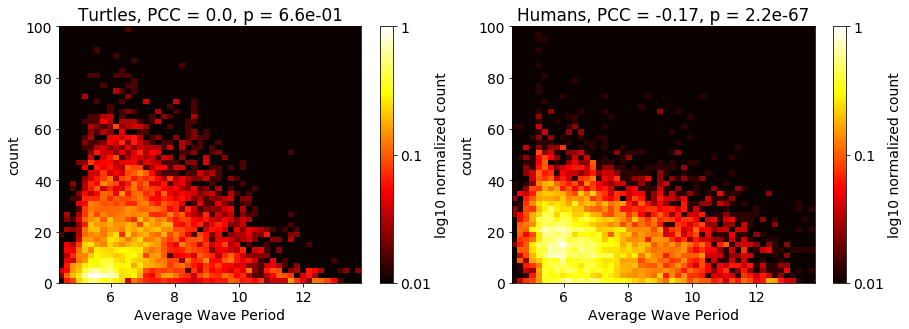

Wave Direction


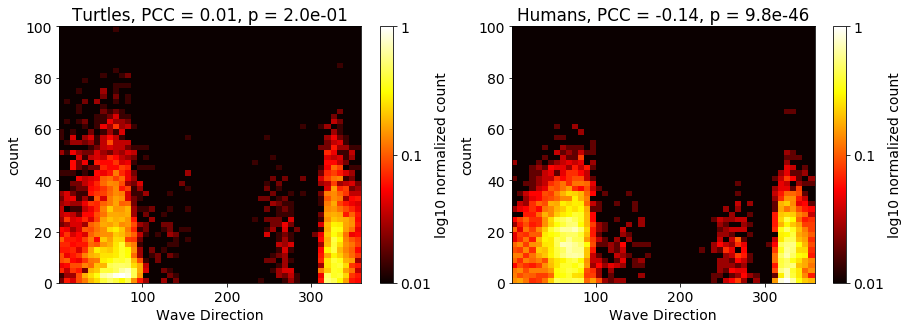

Year


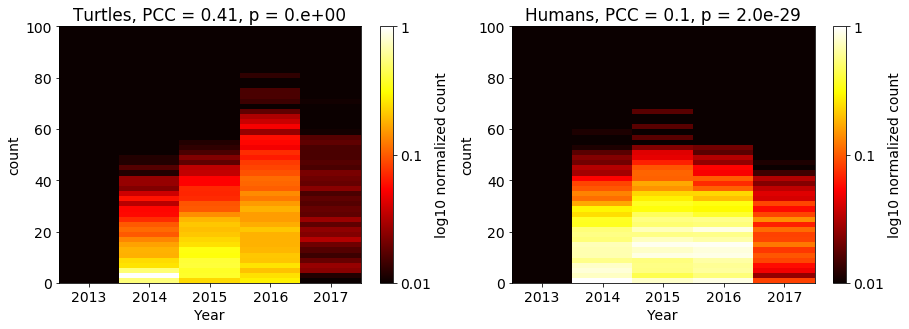

Month


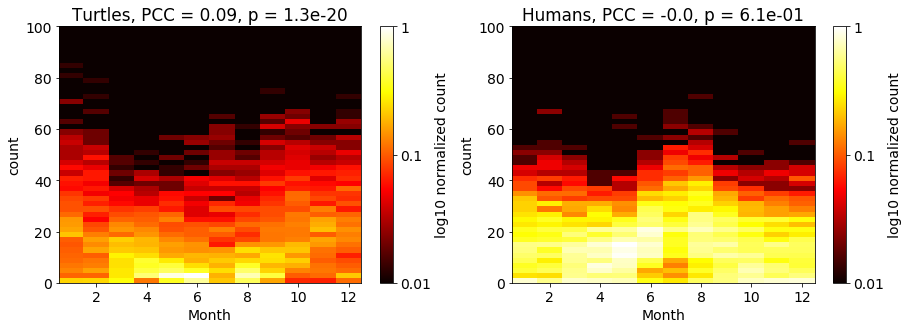

Day


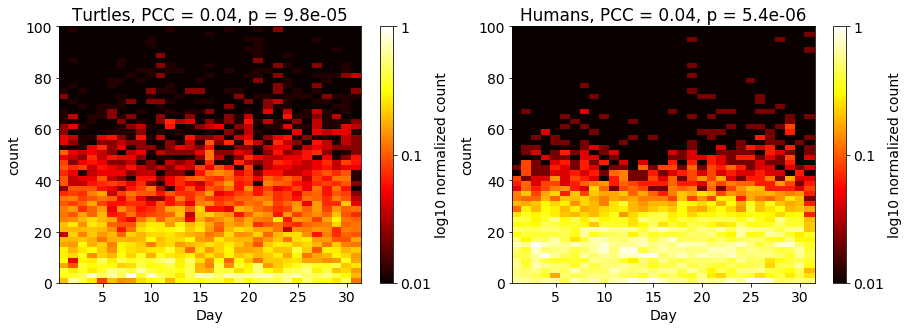

Hour


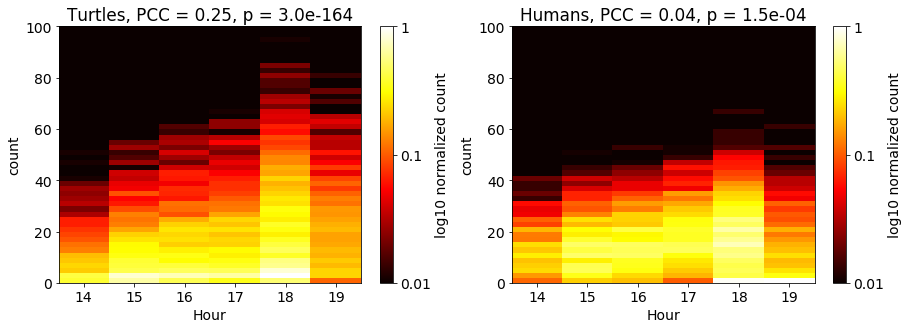

Min


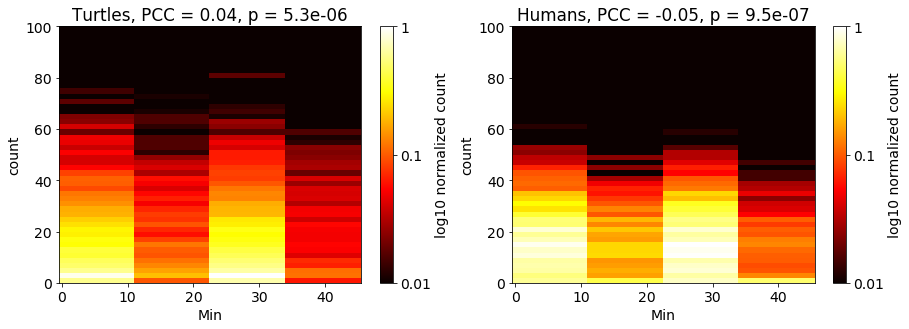

weekday


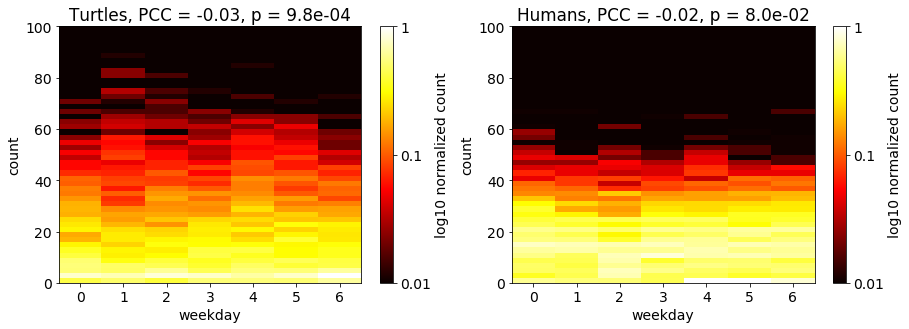

weekend


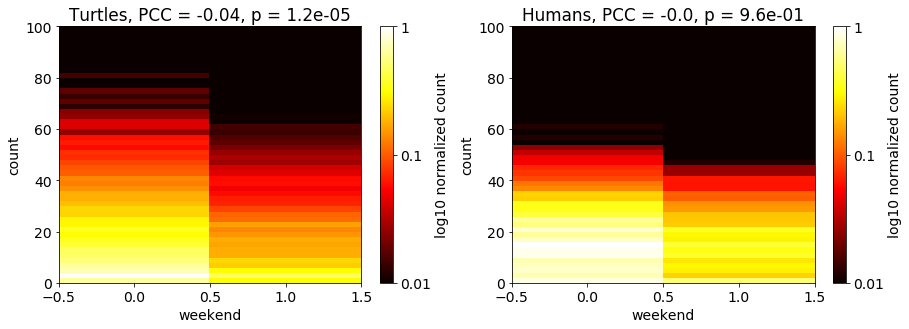

In [34]:

columns = list(df.columns)

for c in columns[3:]:
    print(c)
    x = np.array(df[c])[pd.notnull(df[c])]
    turtles = np.array(df['TurtleNumber'])[pd.notnull(df[c])]
    humans = np.array(df['PeopleNumber'])[pd.notnull(df[c])]
    
    if len(np.unique(x)) < 35:
        bins = [len(np.unique(x)),50]
        ranges = [[min(x)-0.5,max(x)+0.5],[0,100]]
    else:
        bins = 50
        ranges = [[min(x),max(x)],[0,100]]

    plt.figure(figsize=(6.4*2e0,4.8))
    plt.subplot(121) 
    heatmap, xedges, yedges = np.histogram2d(x,turtles, bins=bins,range=ranges)
    #heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=1)[:,None]
    #heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=0)[None,:]
    heatmap_normed = 1e0*heatmap / np.max(heatmap)
    heatmap_normed[heatmap == 0] = 0.01
    plt.pcolormesh(xedges, yedges, np.log10(heatmap_normed).T,cmap='hot',vmin=-2,vmax=0,facecolor='k')
    plt.xlabel(c)
    plt.ylabel('count')
    plt.title('Turtles, PCC = '+str(np.around(pearsonr(x,turtles)[0],2))+', p = '+str(np.format_float_scientific(pearsonr(x,turtles)[1],precision=1)))
    cbar = plt.colorbar(label='log10 normalized count',ticks=[-2, -1, 0])
    cbar.ax.set_yticklabels([0.01,0.1,1])  # vertically oriented colorbar
    plt.tight_layout()

    plt.subplot(122)   
    heatmap, xedges, yedges = np.histogram2d(x,humans, bins=bins,range=ranges)
    #heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=1)[:,None]
    #heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=0)[None,:]
    heatmap_normed = 1e0*heatmap / np.max(heatmap)
    heatmap_normed[heatmap == 0] = 0.01
    plt.pcolormesh(xedges, yedges, np.log10(heatmap_normed).T,cmap='hot',vmin=-2,vmax=0,facecolor='k')
    plt.xlabel(c)
    plt.ylabel('count')
    plt.title('Humans, PCC = '+str(np.around(pearsonr(x,humans)[0],2))+', p = '+str(np.format_float_scientific(pearsonr(x,humans)[1],precision=1)))
    cbar = plt.colorbar(label='log10 normalized count',ticks=[-2, -1, 0])
    cbar.ax.set_yticklabels([0.01,0.1,1])  # vertically oriented colorbar
    plt.tight_layout()
    plt.show()
    


['DateTime', 'TurtleNumber', 'PeopleNumber', 'Nr_Volunteers', 'tide', 'daily mean tide', 'daily min tide', 'daily max tide', 'daily stdev tide', 'total tourists, 1 day(s) ago', 'domestic tourists, 1 day(s) ago', 'international tourists, 1 day(s) ago', 'japanese tourists, 1 day(s) ago', 'other tourists,1 day(s) ago', 'total tourists, 2 day(s) ago', 'domestic tourists, 2 day(s) ago', 'international tourists, 2 day(s) ago', 'japanese tourists, 2 day(s) ago', 'other tourists,2 day(s) ago', 'total tourists, 3 day(s) ago', 'domestic tourists, 3 day(s) ago', 'international tourists, 3 day(s) ago', 'japanese tourists, 3 day(s) ago', 'other tourists,3 day(s) ago', 'total tourists, 4 day(s) ago', 'domestic tourists, 4 day(s) ago', 'international tourists, 4 day(s) ago', 'japanese tourists, 4 day(s) ago', 'other tourists,4 day(s) ago', 'total tourists, 5 day(s) ago', 'domestic tourists, 5 day(s) ago', 'international tourists, 5 day(s) ago', 'japanese tourists, 5 day(s) ago', 'other tourists,5 day

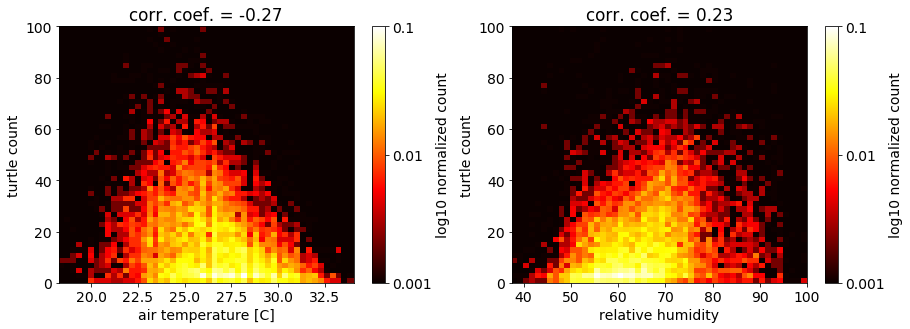

In [35]:

columns = list(df.columns)

print(columns)



x1 = np.array(df['DRYBULBTEMPC'])[pd.notnull(df['DRYBULBTEMPC'])]
x2 = np.array(df['RelativeHumidity'])[pd.notnull(df['RelativeHumidity'])]
turtles1 = nrT[pd.notnull(df['DRYBULBTEMPC'])]
turtles2 = nrT[pd.notnull(df['RelativeHumidity'])]


plt.figure(figsize=(6.4*2e0,4.8))
plt.subplot(121) 
if len(np.unique(x1)) < 35:
    bins = [len(np.unique(x1)),50]
    ranges = [[min(x1)-0.5,max(x1)+0.5],[0,100]]
else:
    bins = 50
    ranges = [[min(x1),max(x1)],[0,100]]


heatmap, xedges, yedges = np.histogram2d(x1,turtles1, bins=bins,range=ranges)
#heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=1)[:,None]
#heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=0)[None,:]
heatmap_normed = 1e0*heatmap / np.max(heatmap)
heatmap_normed[heatmap == 0] = 0.01
plt.pcolormesh(xedges, yedges, np.log10(heatmap_normed).T,cmap='hot',vmin=-2,vmax=0)
plt.xlabel('air temperature [C]')
plt.ylabel('turtle count')
plt.title('corr. coef. = '+str(np.around(pearsonr(x1,turtles1)[0],2)))
cbar = plt.colorbar(label='log10 normalized count',ticks=[-2, -1, 0])
cbar.ax.set_yticklabels([0.001,0.01,0.1,1])  # vertically oriented colorbar
plt.tight_layout()

plt.subplot(122)  
if len(np.unique(x2)) < 35:
    bins = [len(np.unique(x)),50]
    ranges = [[min(x2)-0.5,max(x2)+0.5],[0,100]]
else:
    bins = 50
    ranges = [[min(x2),max(x2)],[0,100]]

heatmap, xedges, yedges = np.histogram2d(x2,turtles2, bins=bins,range=ranges)
#heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=1)[:,None]
#heatmap_normed = 1e0*heatmap / np.sum(heatmap,axis=0)[None,:]
heatmap_normed = 1e0*heatmap / np.max(heatmap)
heatmap_normed[heatmap == 0] = 0.01
plt.pcolormesh(xedges, yedges, np.log10(heatmap_normed).T,cmap='hot',vmin=-2,vmax=0)
plt.xlabel('relative humidity')
plt.ylabel('turtle count')
plt.title('corr. coef. = '+str(np.around(pearsonr(x2,turtles2)[0],2)))
cbar = plt.colorbar(label='log10 normalized count',ticks=[-2, -1, 0])
cbar.ax.set_yticklabels([0.001,0.01,0.1,1])  # vertically oriented colorbar
plt.tight_layout()
plt.savefig('../results/heatmaps.png',dpi=300)
plt.show()



/anaconda3/envs/datasci_v0.0.2_local1/lib/python3.6/site-packages/ipykernel_launcher.py:62: RankWarning: Polyfit may be poorly conditioned
/anaconda3/envs/datasci_v0.0.2_local1/lib/python3.6/site-packages/ipykernel_launcher.py:65: RankWarning: Polyfit may be poorly conditioned


[0.60416667 0.625      0.64583333 0.66666667 0.6875     0.70833333
 0.72916667 0.75       0.76041667 0.77083333 0.78125    0.79166667
 0.80208333 0.8125     0.82291667]


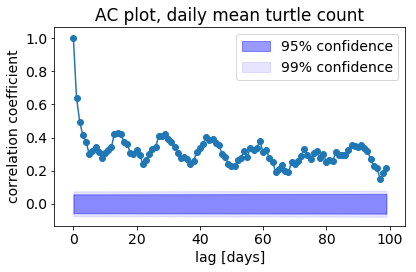

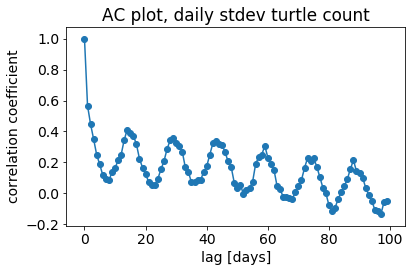

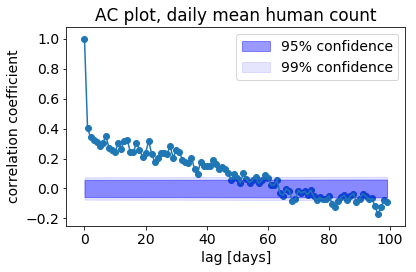

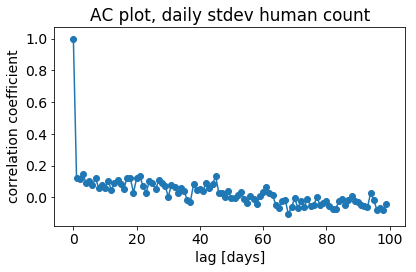

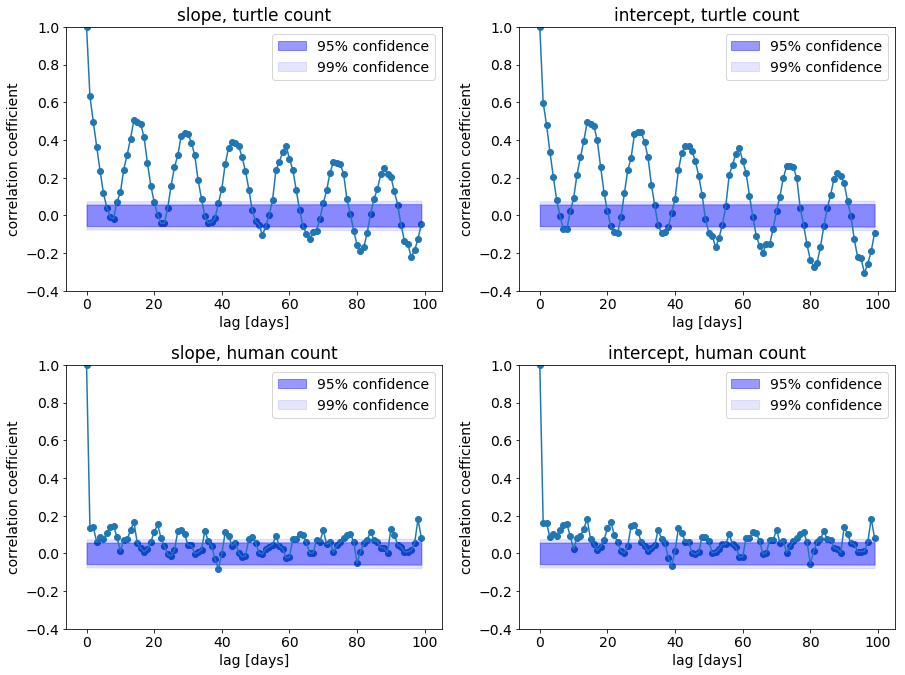

In [36]:
# autocorrelation plots

import pandas as pd
import numpy as np
import matplotlib
from scipy.special import erfinv
from scipy.stats import pearsonr
from matplotlib import pylab as plt
%matplotlib inline

np.random.seed(0)

df = pd.read_csv('../data/combined_dataset.csv')

# target variables:
Y_T = df['TurtleNumber']
Y_P = df['PeopleNumber']

# datetime
datetime = df['DateTime']
# remove columns
df.drop(['TurtleNumber','PeopleNumber','DateTime'],axis=1,inplace=True)
# features
X = df

X['float_hour'] = 1e0*(pd.to_datetime(datetime).dt.hour +  pd.to_datetime(datetime).dt.minute/60e0) / 24e0

matplotlib.rcParams.update({'font.size': 14})

def autocorr(x, t=1):
    return pd.Series(x[0:len(x)-t]).corr(pd.Series(x[t:len(x)])),1.96/np.sqrt(len(x)-t),2.58/np.sqrt(len(x)-t)

days = np.array([d[:10] for d in np.array(datetime)])
unique_days = sorted(np.unique(days))
date_range = np.array([d[:10] for d in pd.date_range(days[0],days[-1]).astype(str)])

daily_mean_T = np.zeros(len(date_range))*np.nan
daily_std_T = np.zeros(len(date_range))*np.nan
daily_mean_P = np.zeros(len(date_range))*np.nan
daily_std_P = np.zeros(len(date_range))*np.nan
daily_slope_T = np.zeros(len(date_range))*np.nan
daily_intercept_T = np.zeros(len(date_range))*np.nan
daily_slope_P = np.zeros(len(date_range))*np.nan
daily_intercept_P = np.zeros(len(date_range))*np.nan
daily_std_tide = np.zeros(len(date_range))*np.nan
daily_min_tide = np.zeros(len(date_range))*np.nan
daily_max_tide = np.zeros(len(date_range))*np.nan


for i in range(len(date_range)):
    if date_range[i] in unique_days:
        daily_mean_T[i] = np.mean(np.array(Y_T)[days == date_range[i]])
        daily_std_T[i] = np.std(np.array(Y_T)[days == date_range[i]])
        daily_mean_P[i] = np.mean(np.array(Y_P)[days == date_range[i]])
        daily_std_P[i] = np.std(np.array(Y_P)[days == date_range[i]])
        if len(np.unique(np.array(X['daily stdev tide'])[days == date_range[i]])) > 1:
            raise ValueError
        else:
            daily_std_tide[i] = np.unique(np.array(X['daily stdev tide'])[days == date_range[i]])[0]
        daily_min_tide[i] = np.unique(np.array(X['daily min tide'])[days == date_range[i]])[0]
        daily_max_tide[i] = np.unique(np.array(X['daily max tide'])[days == date_range[i]])[0]
        (slope,intercept) = np.polyfit(np.array(X['float_hour'])[days == date_range[i]],np.array(Y_T)[days == date_range[i]],deg=1)
        daily_slope_T[i] = slope
        daily_intercept_T[i] = intercept
        (slope,intercept) = np.polyfit(np.array(X['float_hour'])[days == date_range[i]],np.array(Y_P)[days == date_range[i]],deg=1)
        daily_slope_P[i] = slope
        daily_intercept_P[i] = intercept
    
    
print(np.unique(X['float_hour']))
length = 100
ACF_mean_T = np.zeros(length)
ACF_std_T = np.zeros(length)
ACF_mean_P = np.zeros(length)
ACF_std_P = np.zeros(length)
ACF_slope_T = np.zeros(length)
ACF_intercept_T = np.zeros(length)
ACF_slope_P = np.zeros(length)
ACF_intercept_P = np.zeros(length)
conf_95 = np.zeros(length)
conf_99 = np.zeros(length)
conf_95_P = np.zeros(length)
conf_99_P = np.zeros(length)
for d in range(length):
    ACF_mean_T[d],conf_95[d],conf_99[d] = autocorr(daily_mean_T,t=d)
    ACF_std_T[d],_,_ = autocorr(daily_std_T,t=d)
    ACF_mean_P[d],conf_95_P[d],conf_99_P[d] = autocorr(daily_mean_P,t=d)
    ACF_std_P[d],_,_ = autocorr(daily_std_P,t=d)
    ACF_slope_T[d],_,_ = autocorr(daily_slope_T,t=d)
    ACF_intercept_T[d],_,_ = autocorr(daily_intercept_T,t=d)
    ACF_slope_P[d],_,_ = autocorr(daily_slope_P,t=d)
    ACF_intercept_P[d],_,_ = autocorr(daily_intercept_P,t=d)
    
plt.plot(range(length),ACF_mean_T)
plt.scatter(range(length),ACF_mean_T)
plt.fill_between(range(length),-conf_95,conf_95,alpha=0.4,color='b',label='95% confidence')
plt.fill_between(range(length),-conf_99,conf_99,alpha=0.1,color='b',label='99% confidence')
plt.title('AC plot, daily mean turtle count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.legend()
plt.tight_layout()
plt.savefig('../results/autocorr_mean_T.png',dpi=300)
plt.show()

plt.plot(range(length),ACF_std_T)
plt.scatter(range(length),ACF_std_T)
plt.title('AC plot, daily stdev turtle count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.tight_layout()
plt.savefig('../results/autocorr_std_T.png',dpi=300)
plt.show()

plt.plot(range(length),ACF_mean_P)
plt.scatter(range(length),ACF_mean_P)
plt.fill_between(range(length),-conf_95_P,conf_95_P,alpha=0.4,color='b',label='95% confidence')
plt.fill_between(range(length),-conf_99_P,conf_99_P,alpha=0.1,color='b',label='99% confidence')
plt.title('AC plot, daily mean human count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.legend()
plt.tight_layout()
plt.savefig('../results/autocorr_mean_H.png',dpi=300)
plt.show()

plt.plot(range(length),ACF_std_P)
plt.scatter(range(length),ACF_std_P)
plt.title('AC plot, daily stdev human count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.tight_layout()
plt.savefig('../results/autocorr_std_H.png',dpi=300)
plt.show()


plt.figure(figsize=(6.4*2e0,4.8*2e0))
plt.subplot(221)
plt.plot(range(length),ACF_slope_T)
plt.scatter(range(length),ACF_slope_T)
plt.fill_between(range(length),-conf_95,conf_95,alpha=0.4,color='b',label='95% confidence')
plt.fill_between(range(length),-conf_99,conf_99,alpha=0.1,color='b',label='99% confidence')
plt.legend()
plt.title('slope, turtle count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.ylim([-0.4,1])

plt.subplot(222)
plt.plot(range(length),ACF_intercept_T)
plt.scatter(range(length),ACF_intercept_T)
plt.fill_between(range(length),-conf_95,conf_95,alpha=0.4,color='b',label='95% confidence')
plt.fill_between(range(length),-conf_99,conf_99,alpha=0.1,color='b',label='99% confidence')
plt.legend()
plt.title('intercept, turtle count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.ylim([-0.4,1])

plt.subplot(223)
plt.plot(range(length),ACF_slope_P)
plt.scatter(range(length),ACF_slope_P)
plt.fill_between(range(length),-conf_95,conf_95,alpha=0.4,color='b',label='95% confidence')
plt.fill_between(range(length),-conf_99,conf_99,alpha=0.1,color='b',label='99% confidence')
plt.legend()
plt.title('slope, human count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.ylim([-0.4,1])

plt.subplot(224)
plt.plot(range(length),ACF_intercept_P)
plt.scatter(range(length),ACF_intercept_P)
plt.fill_between(range(length),-conf_95,conf_95,alpha=0.4,color='b',label='95% confidence')
plt.fill_between(range(length),-conf_99,conf_99,alpha=0.1,color='b',label='99% confidence')
plt.legend()
plt.title('intercept, human count')
plt.xlabel('lag [days]')
plt.ylabel('correlation coefficient')
plt.ylim([-0.4,1])

plt.tight_layout()
plt.savefig('../results/autocorr.png',dpi=300)
plt.show()



11691


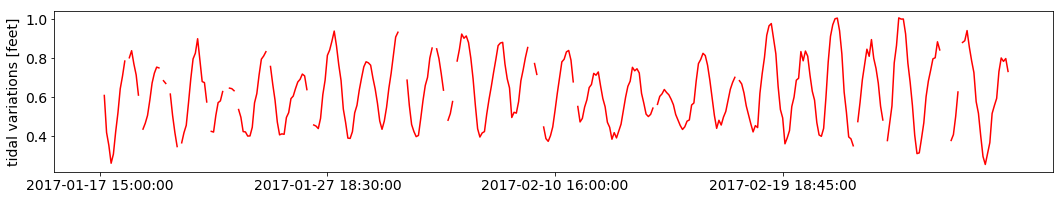

[0.05730112 0.05727665 0.05725221 0.0572278  0.05720342 0.05717908
 0.05715476 0.05713048 0.05710622 0.057082   0.05705781 0.05703364
 0.05700951 0.05698541 0.05696134 0.05698541 0.05700951 0.05703364
 0.05705781 0.057082   0.05710622 0.05713048 0.05715476 0.05717908
 0.05720342 0.0572278  0.05725221 0.05727665 0.05730112]
[0.07542699 0.07539478 0.0753626  0.07533047 0.07529838 0.07526634
 0.07523433 0.07520236 0.07517043 0.07513855 0.0751067  0.0750749
 0.07504313 0.07501141 0.07497973 0.07501141 0.07504313 0.0750749
 0.0751067  0.07513855 0.07517043 0.07520236 0.07523433 0.07526634
 0.07529838 0.07533047 0.0753626  0.07539478 0.07542699]


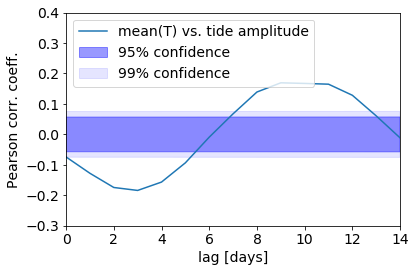

In [37]:
print(len(days))
plt.figure(figsize=(15,3))
#plt.plot(daily_mean_T[-600:],color='k')
plt.plot(np.array(datetime)[-400:],daily_std_tide[-400:],color='r')
plt.ylabel('tidal variations [feet]')
plt.xticks(np.array(datetime)[-400::100])
plt.tight_layout()
plt.savefig('../results/tides.png',dpi=300)
plt.show()


# what is the lag between the slope and the std_tide?
def corr(x,y,t):
    if len(x) != len(y):
        raise ValueError
    if t >= 0:
#         plt.scatter(x[t:len(x)],y[0:len(y)-t])
#         plt.title(str(t))
#         plt.show()
        return pd.Series(x[t:len(x)]).corr(pd.Series(y[0:len(y)-t])),1.96/np.sqrt(len(y)-t),2.58/np.sqrt(len(y)-t)

    else:
#         plt.scatter(x[0:len(x)+t],y[-t:len(y)])
#         plt.title(str(t))
#         plt.show()
        return pd.Series(x[0:len(x)+t]).corr(pd.Series(y[-t:len(y)])),1.96/np.sqrt(len(y)+t),2.58/np.sqrt(len(y)+t)
#    return pd.Series(x[t:len(x)]).corr(pd.Series(y[0:len(y)-t]))
        
lag_days = np.arange(-14,15)
corr_coeff_mean = np.zeros(len(lag_days))
conf_mean_95 = np.zeros(len(lag_days))
conf_mean_99 = np.zeros(len(lag_days))
corr_coeff_std = np.zeros(len(lag_days))
conf_std_95 = np.zeros(len(lag_days))
conf_std_99 = np.zeros(len(lag_days))
corr_coeff_slope = np.zeros(len(lag_days))
conf_slope_95 = np.zeros(len(lag_days))
conf_slope_99 = np.zeros(len(lag_days))
corr_coeff_intercept = np.zeros(len(lag_days))
conf_intercept_95 = np.zeros(len(lag_days))
conf_intercept_99 = np.zeros(len(lag_days))

for i in range(len(lag_days)):
    corr_coeff_mean[i],conf_mean_95[i],conf_mean_99[i] = corr(daily_mean_T,daily_max_tide-daily_min_tide,lag_days[i])
    corr_coeff_std[i],conf_std_95[i],conf_std_99[i] = corr(daily_std_T,daily_max_tide-daily_min_tide,lag_days[i])
    corr_coeff_slope[i],conf_slope_95[i],conf_slope_99[i] = corr(daily_slope_T,daily_max_tide-daily_min_tide,lag_days[i])
    corr_coeff_intercept[i],conf_intercept_95[i],conf_intercept_99[i] = corr(daily_intercept_T,daily_max_tide-daily_min_tide,lag_days[i])

print(conf_mean_95)
print(conf_mean_99)

plt.plot(lag_days,corr_coeff_mean,label='mean(T) vs. tide amplitude')
#plt.plot(lag_days,corr_coeff_std,label='stdev(T) vs. tide amplitude')
#plt.plot(lag_days,corr_coeff_slope,label='slope(T) vs. tide amplitude')
#plt.plot(lag_days,corr_coeff_intercept,label='intercept(T) vs. tide amplitude')
plt.fill_between(lag_days,-conf_mean_95,conf_mean_95,alpha=0.4,color='b',label='95% confidence')
plt.fill_between(lag_days,-conf_mean_99,conf_mean_99,alpha=0.1,color='b',label='99% confidence')
plt.ylim([-0.3,0.4])
plt.xlim([0,14])
plt.xlabel('lag [days]')
plt.ylabel('Pearson corr. coeff.')
plt.tight_layout()
plt.legend()
plt.tight_layout()
plt.savefig('../results/corr_coeff_T_vs_tide.png',dpi=300)
plt.show()



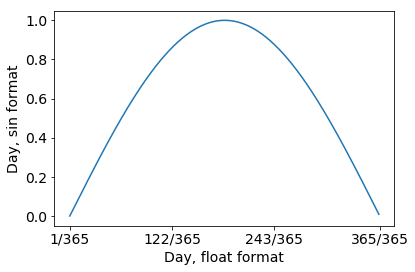

In [38]:

days = np.arange(365)

plt.plot(days/365,np.sin(days/365*np.pi))
plt.xticks([0,0.33,0.66,1.0],['1/365','122/365','243/365','365/365'])
plt.xlabel('Day, float format')
plt.ylabel('Day, sin format')
plt.tight_layout()
plt.show()
